# Team: Apex_Legends

## Members:

| Name | Registration Number | Roll Number |
|-----------|-----------|-----------|
| Dinesh Kumar Majhi | 12306254 | RQ2355A15 |
| Abhishek Shivhare | 12306295 | RQ2355A16 |
| Kundan Popandiya | 12314315 | RQ2355A05 |
| Harsh Singh | 12314570 | RQ2355A06 |
| Anand Kumar Azad | 12307577 | RQ2355A14 |
| Sagar Behera | 12309428 | RQ2355A19 |

## You can find the dataset from the link below:
[Kaggle](https://www.kaggle.com/datasets/shashwatwork/impact-of-covid19-pandemic-on-the-global-economy/data?select=raw_data.csv)

# About Dataset
#### Content
#### Data for 170 countries with respect to the impact of covid-19

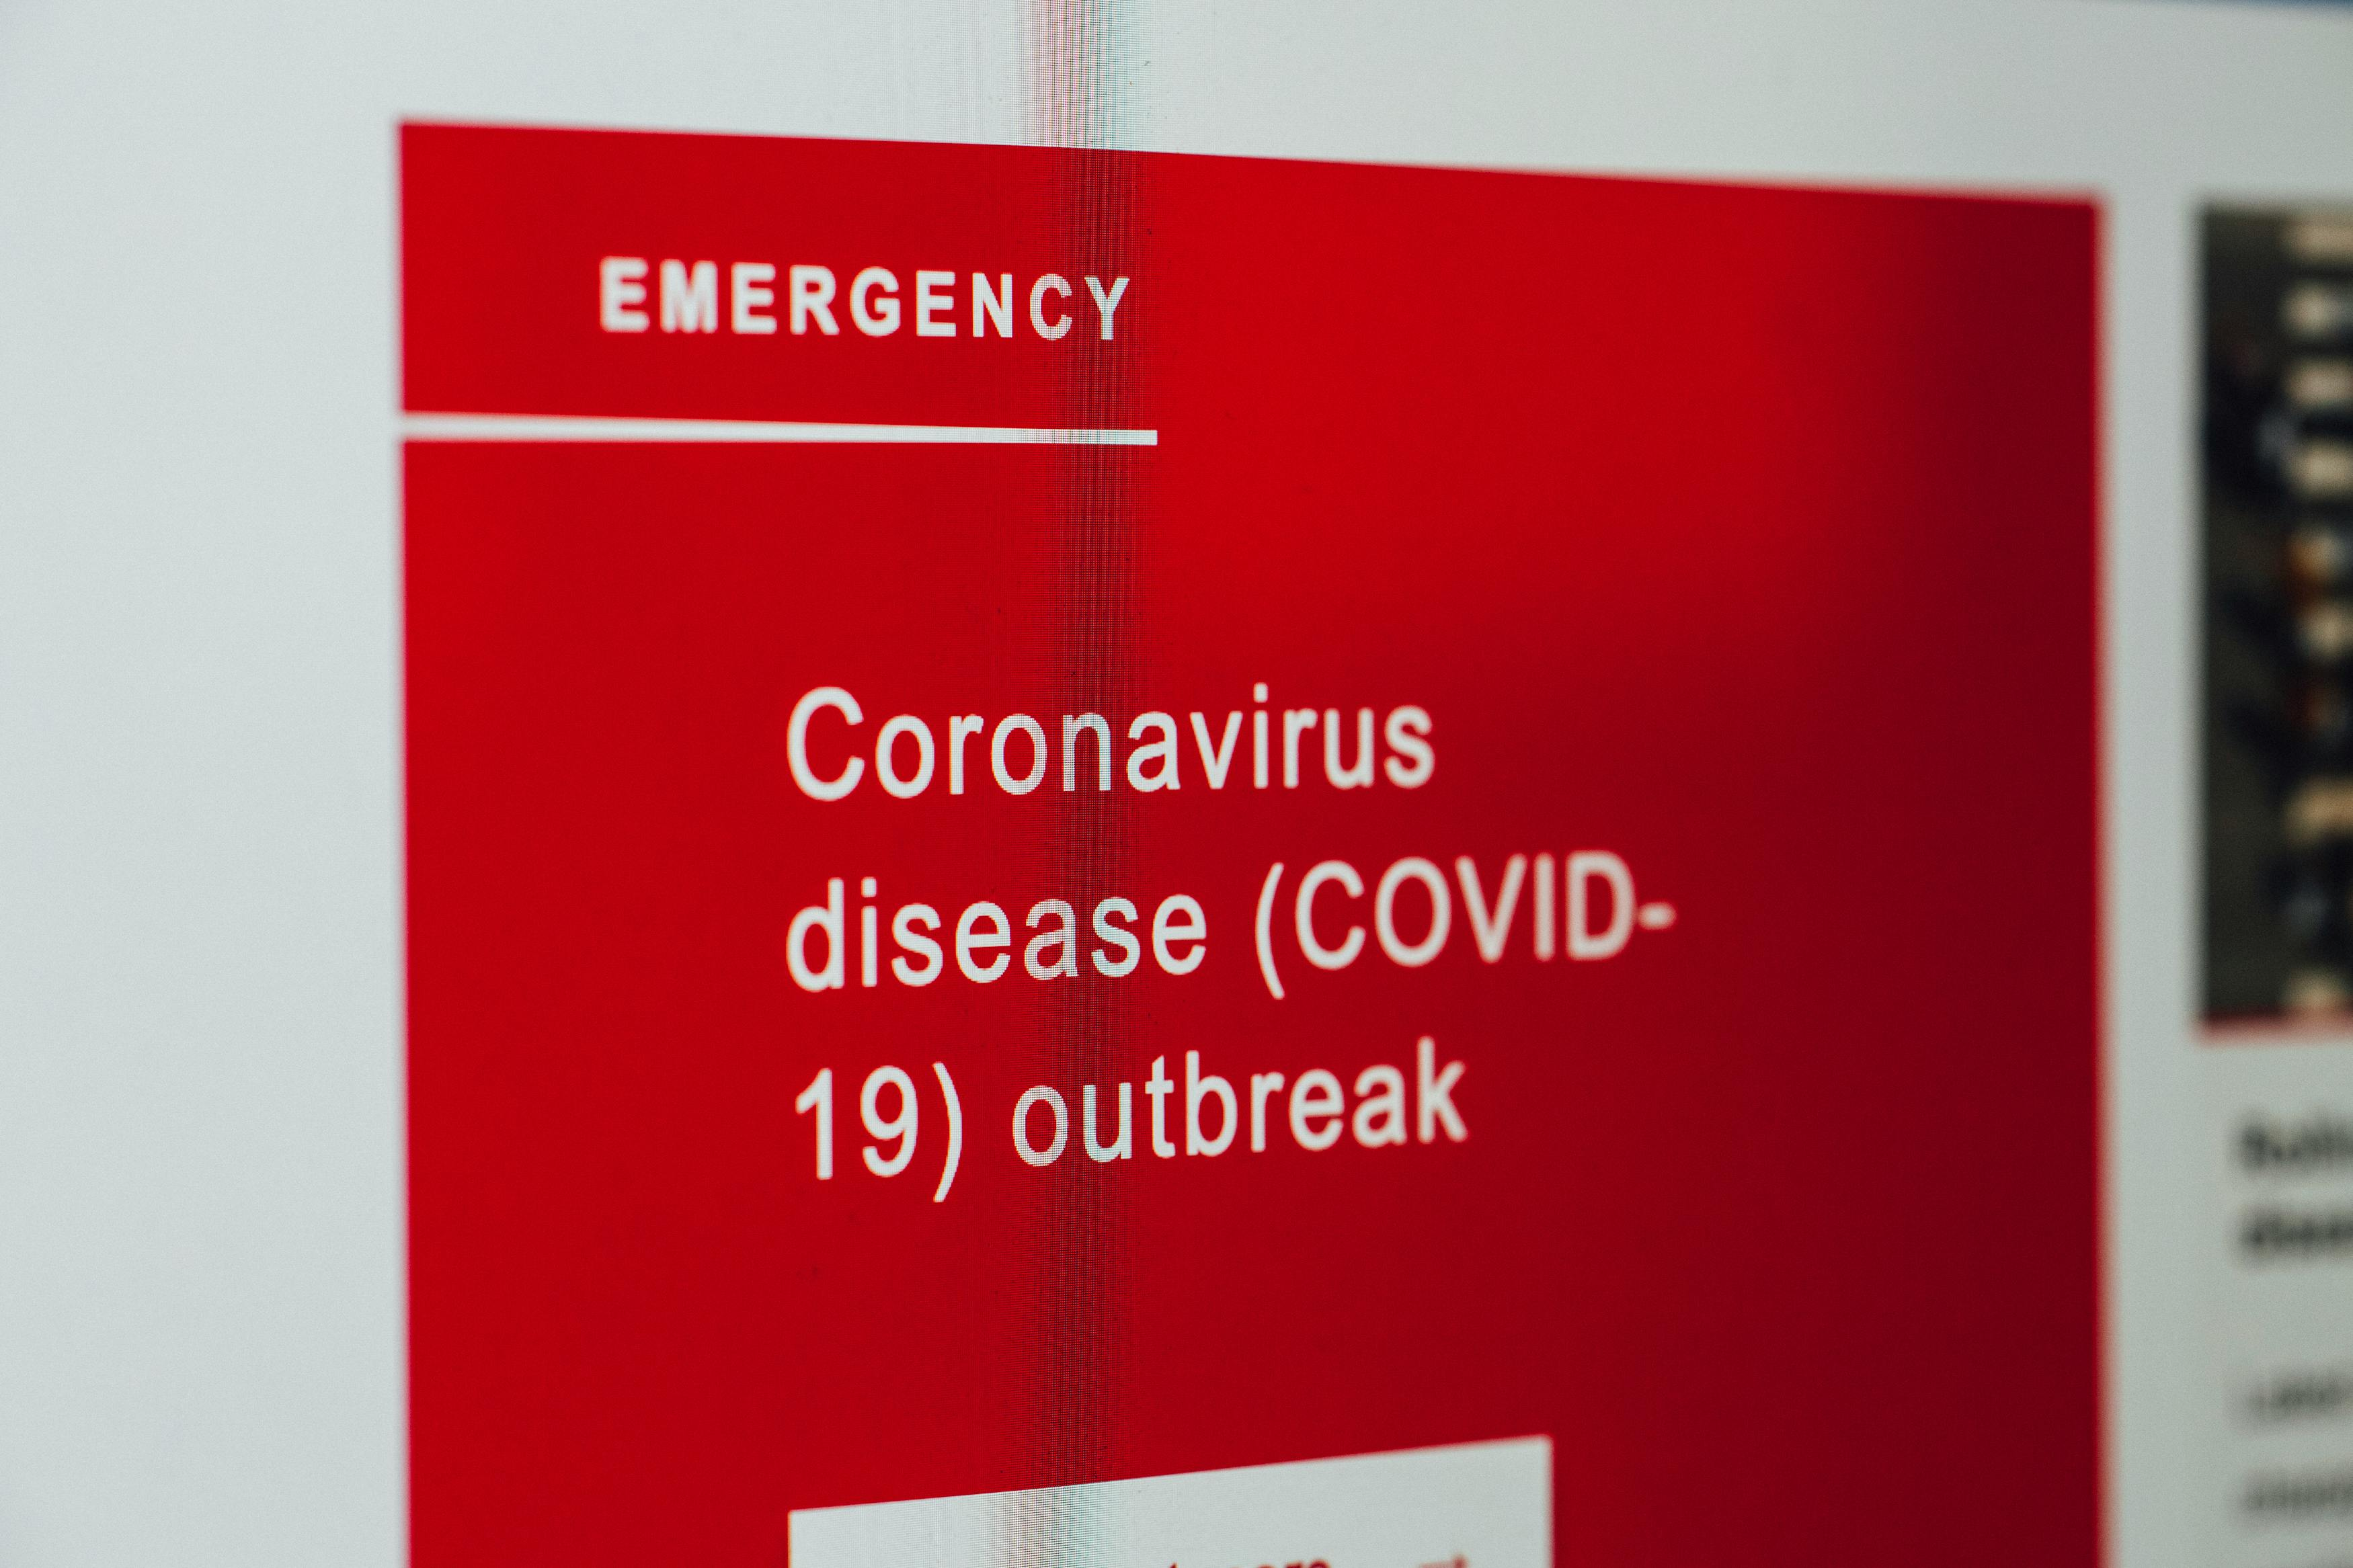

In [139]:
from IPython.display import display, Image
display(Image(filename='covid.jpg'))

# Impact of Covid-19 Pandemic on the Global level

### The outbreak of Covid-19 has led to many restrictions that have had a major impact on the global economy. Almost all countries were negatively affected by the increase in Covid-19 cases. The first wave of Covid-19 affected the global economy as the world was not prepared to prevent the epidemic. It causes the economy to slow down by increasing the number of patients, increasing death rates, increasing unemployment and increasing poverty.

### Let's import necessary libraries to go down with our analysis

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Now loading the data into a dataframe from local host:

In [126]:
data = pd.read_csv("raw_data.csv")
data.head(5)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [127]:
data.columns.tolist()

['iso_code',
 'location',
 'date',
 'total_cases',
 'total_deaths',
 'stringency_index',
 'population',
 'gdp_per_capita',
 'human_development_index',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13']

### We can see some of the non relevant columns, so we need to transform the data.

### Let's delete the columns:

In [128]:
data.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], inplace = True)

In [129]:
data.columns.tolist()

['iso_code',
 'location',
 'date',
 'total_cases',
 'total_deaths',
 'stringency_index',
 'population',
 'gdp_per_capita',
 'human_development_index']

### Now, we can see that the columns that defined have been deleted from the above observation.

### Do we have null values? 
Lets check:

In [130]:
data.isna().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

<AxesSubplot:>

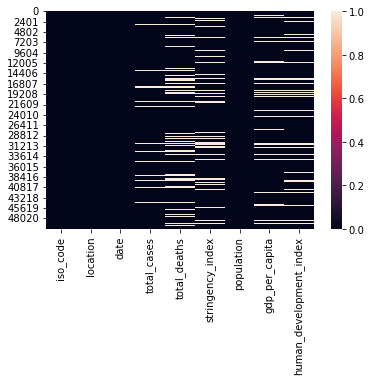

In [131]:
import seaborn as sns
sns.heatmap(data.isnull())

### What it the percentage of null values?
### We can find it using mean function and some extra calculation.

In [132]:
(data.isna().mean() * 100).round(2)

iso_code                    0.00
location                    0.00
date                        0.00
total_cases                 6.14
total_deaths               22.19
stringency_index           14.13
population                  0.00
gdp_per_capita             11.33
human_development_index    12.30
dtype: float64

### Let's plot the null percentage in each columns

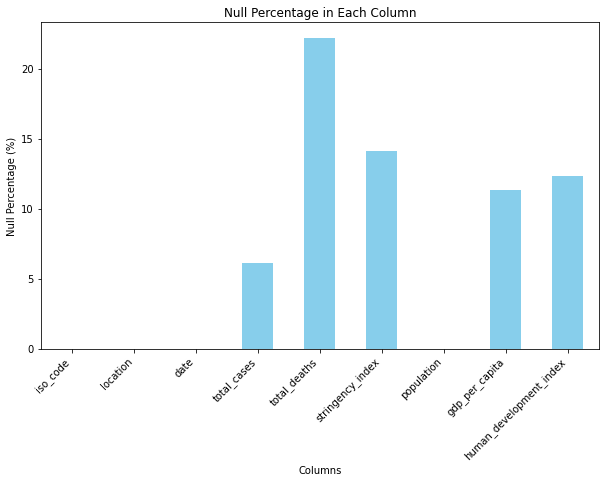

In [133]:
plt.figure(figsize=(10, 6))
(data.isna().mean() * 100).round(2).plot(kind='bar', color='skyblue')
plt.title('Null Percentage in Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that there are null values available in columns like:
1. total_cases:                6.14%
2. total_deaths:               22.19%
3. stringency_index:           14.13%
4. gdp_per_capita:             11.33%
5. human_development_index:    12.30%

### Now lets fill the null values with the mean to normalize the data

In [134]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include='number')

# Exclude columns where all values are null
numeric_columns = numeric_columns.dropna(axis=1, how='all')

# Replace null values with the mean of each numeric column
data[numeric_columns.columns] = data[numeric_columns.columns].apply(lambda col: col.fillna(col.mean()))

In [135]:
data.isna().mean()

iso_code                   0.0
location                   0.0
date                       0.0
total_cases                0.0
total_deaths               0.0
stringency_index           0.0
population                 0.0
gdp_per_capita             0.0
human_development_index    0.0
dtype: float64

<AxesSubplot:>

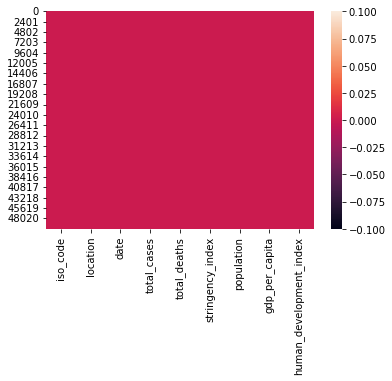

In [136]:
sns.heatmap(data.isnull())

### The above heatmap shows the abscence of null values.

In [137]:
data.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,5.041800e+04,50418.000000,50418.000000,5.041800e+04,50418.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,3.919481e+05,12204.916580,25.512844,1.564607e+08,19248.613445,0.150680
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.480000e+02,18.000000,41.670000,1.399491e+06,6253.104000,0.640000
50%,2.057500e+03,200.000000,56.162022,8.278737e+06,16409.288000,0.723000
75%,2.871075e+04,2978.767819,76.390000,2.913681e+07,27936.896000,0.825000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


### The above shows the statistics of the data fro each columns

# Questions that can occur:

## Question 1: How many covid-19 cases occured per country?

## Question 2: What are the top 10 countries with case counts?

## Question 3: What are the top 10 countries with death counts?

## Question 4: What are the top 10 countries with the stingency index?

## Question 5: What are the top 10 countries with GDP per capita?

## Question 6: On which date India had the most and least death counts?

## Question 7: Average case counts per country (Top 10)

## Question 8: Average death counts per country (Top 10)

## Question 9 : Which countries have maximum human development index? (Top 10)

## Question 10: What is the average GDP per Capita? Show top 10 countries.

## Question 11: Use statistical analysis to compare the COVID-19 situation among different countries and show their correlation using correlation matrix.

## Question 12: Visualize the distribution of total cases for different HDI levels.